In [125]:
import os
import numpy as np
import rasterio
from src import pipeline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress
from datetime import datetime
from scipy import stats
from scipy.ndimage import distance_transform_edt
from datetime import date
import glob
import pandas as pd
import random 
import sigfig
import glob

from src import pixel_regression

from importlib import reload
reload(pixel_regression)

<module 'src.pixel_regression' from 'c:\\Users\\oneil\\Documents\\Uni\\RS\\Project\\wedabaywatch\\src\\pixel_regression.py'>

In [ ]:
index_filenames = os.listdir("data/derived/LC08_L2SP_109060_20131017_20200912_02_T1/")

np_index_names = np.array([x for x in index_filenames if "." not in x])

for index_name in np_index_names:
    if index_name == "FERRIC_IRON":
        print('get fucked')
        continue
    plot_index_path = "output/plots/pixelreg_" + index_name + ".svg"
    trend_stack, intercept_stack, dist_plot = pixel_regression.pixel_regression(index_name=index_name, 
                                                                            plot_index_path = plot_index_path,
                                                                            classes_for_reg= [1])


array(['BAI', 'CMI', 'EVI', 'FERRIC_IRON', 'MNDWI', 'NDBI', 'NDGI',
       'NDMI', 'NDVI', 'RGB', 'SAVI', 'SI'], dtype='<U11')

4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete


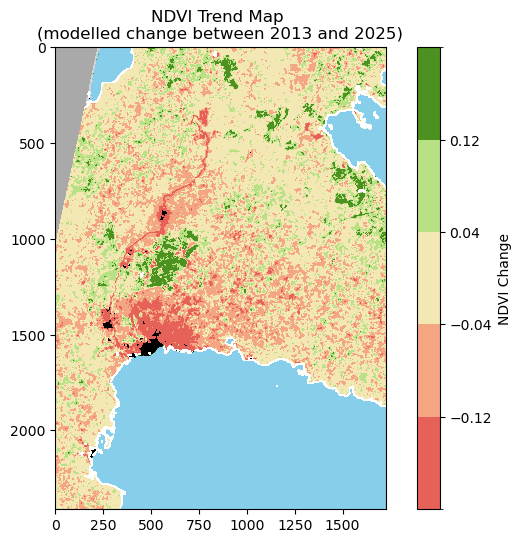

In [145]:
index_name = "NDVI"
plot_index_path = "output/plots/pixelreg_" + index_name + ".svg"
trend_stack, intercept_stack, dist_plot = pixel_regression.pixel_regression(index_name=index_name, 
                                                                            plot_index_path = plot_index_path,
                                                                            classes_for_reg= [1])

In [142]:
final_state, final_state_no_forest = pixel_regression.get_final_state(classes_for_reg = [-1])

In [143]:
final_state_no_forest[-1,-1]

nan

In [90]:
np.nanpercentile(trend_stack_scaled.flatten(),80)

0.0058232867158949375

In [139]:
trend_stack_scaled = trend_stack*365*13

sigfig.round(((np.nanpercentile(trend_stack_scaled,10))*1/3),sigfigs = 1)

-0.04

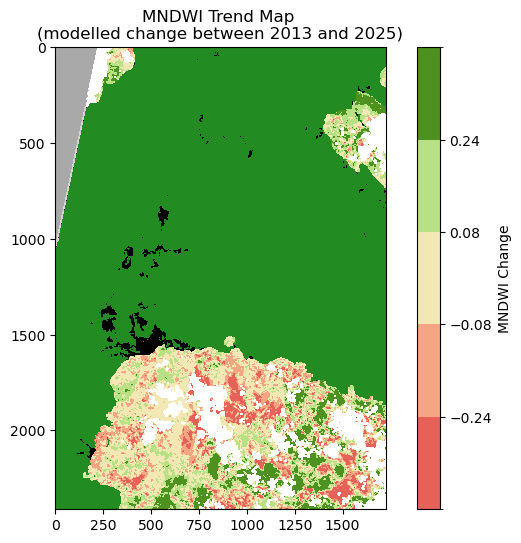

In [144]:
reload(pixel_regression)
pixel_regression.plot_index(
        trend_stack,
        final_state_no_forest,
        index_name)


In [148]:
class_stack, filenames = pixel_regression.get_class_stack()

index_stack = pixel_regression.get_index_stack(class_stack.shape, filenames)

dates_dt, dates_int = pixel_regression.dates_convert(filenames)

4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete


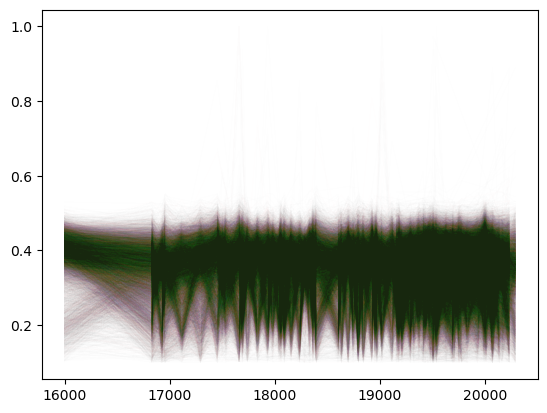

In [23]:
H, W = index_stack.shape[1:]
min_datapoints_for_reg = 5

for y in range(H):
    for x in range(W):
        s = class_stack[:,y,x]
        ndvi_s = index_stack[:,y,x]
        s_filter = ((s == 1) & ~np.isnan(ndvi_s) & (ndvi_s > 0.1))
        if s_filter.sum() < min_datapoints_for_reg:
            continue
        # only print 1% of pixels
        if random.random() > 0.01:
            continue
        plt.plot(dates_int[s_filter],ndvi_s[s_filter], linewidth = 1, alpha = 1/255)
    if y % 100 == 99:
        comp_perc = int(100*y/H)
        print(f"{comp_perc}% complete")

### Calculate relationship between NDVI and distance to a mine

Slope: -2.1482895552196703e-05
Intercept: -0.005073173380456443
R-squared: 0.0009630724195404223
P-value: 0.0


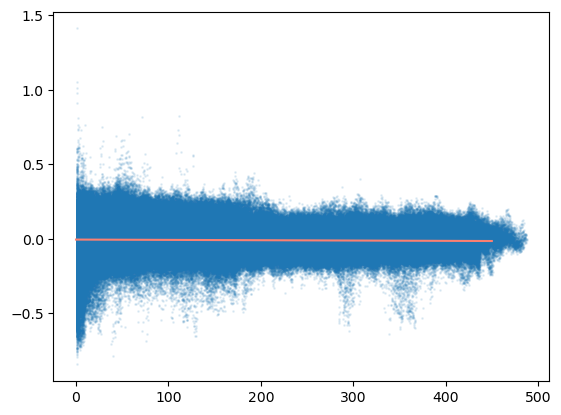

In [146]:
trend_stack_scaled = trend_stack*365*13


# Flattened arrays
x = dist_plot.flatten()
y = trend_stack_scaled.flatten()

plt.scatter(x,y, alpha = 0.1,s=1)

# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

r_squared = r_value**2

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")

reg_line_max = 450

plt.plot([0,reg_line_max],[intercept,intercept+slope*reg_line_max], c = 'salmon')


### Explore seasonality

[10,
 2,
 6,
 11,
 5,
 10,
 12,
 5,
 7,
 10,
 2,
 5,
 9,
 12,
 1,
 3,
 1,
 4,
 6,
 10,
 5,
 7,
 10,
 11,
 3,
 5,
 12,
 7,
 10,
 12,
 2,
 5,
 10,
 2,
 7]

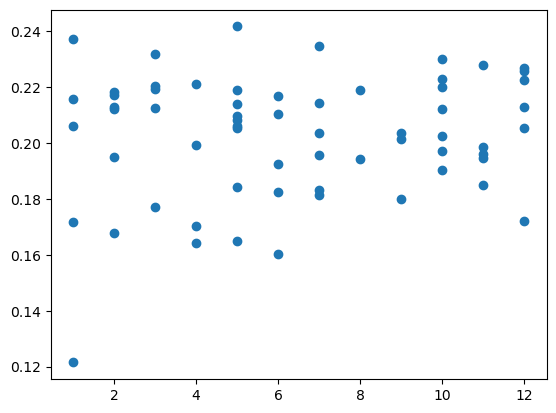

In [149]:

y = np.nanmean(index_stack, axis = (1,2))
x = [dt.month for dt in dates_dt]

plt.scatter(x,y)

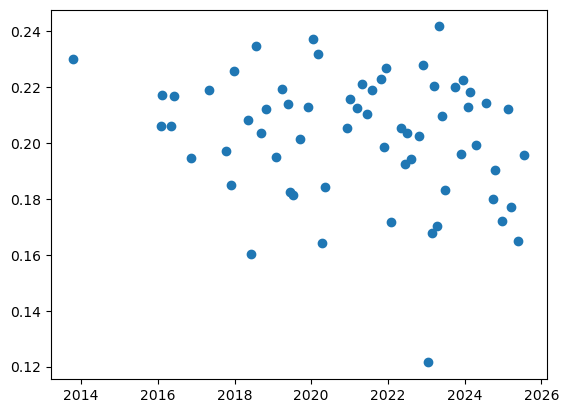

In [150]:
y = np.nanmean(index_stack, axis = (1,2))
x = dates_dt

plt.scatter(x,y)